In [1]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
data=[]

In [36]:
with Chrome(executable_path=r'C:\Users\Aditya\Downloads\chromedriver.exe') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=j8KpV-4_mRg")

    for item in range(200): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
        data.append(comment.text)

In [45]:
import pandas as pd   
df = pd.DataFrame(data, columns=['comment'])
df.head()

,comment
0,IN\nSKIP NAVIGATION\nSIGN IN\n0:00 / 0:23\n#3 ...
1,"Hi, this is Rahul Dravid writing the descripti..."
2,
3,
4,IN\nSKIP NAVIGATION\nSIGN IN\n0:00 / 0:23\n#3 ...


In [37]:
df.shape

(1083, 2)

In [35]:
#df.to_excel('C:/Users/Aditya/Desktop/You tube/Cred_new.xlsx',index = False)

In [51]:
def clean_tweets(comment):
    comment = re.sub("RT @[\w]*:","",comment)
    comment = re.sub("@[\w]*","",comment)
    comment = re.sub(r"https\S+","",comment)
    comment = re.sub("\n","",comment)
    comment = re.sub("#","",comment)
    comment = re.sub("[!@#$+%*:()'-]","",comment)
    return comment

In [52]:
df['comment_new'] = df['comment'].apply(lambda x:clean_tweets(x))

In [53]:
df.head(7)

,comment,comment_new
0,IN\nSKIP NAVIGATION\nSIGN IN\n0:00 / 0:23\n#3 ...,INSKIP NAVIGATIONSIGN IN000 / 0233 ON TRENDING...
1,"Hi, this is Rahul Dravid writing the descripti...","Hi, this is Rahul Dravid writing the descripti..."
2,,
3,,
4,IN\nSKIP NAVIGATION\nSIGN IN\n0:00 / 0:23\n#3 ...,INSKIP NAVIGATIONSIGN IN000 / 0233 ON TRENDING...
5,"Hi, this is Rahul Dravid writing the descripti...","Hi, this is Rahul Dravid writing the descripti..."
6,Jai Rahul Dravid. We can feel you. :p,Jai Rahul Dravid. We can feel you. p


In [54]:
## To remove emoji:
df['comment_new'] = df['comment'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [55]:
df_new = df[5:]

In [56]:
df_new.reset_index(drop=True)

,comment,comment_new
0,"Hi, this is Rahul Dravid writing the descripti...","Hi, this is Rahul Dravid writing the descripti..."
1,Jai Rahul Dravid. We can feel you. :p,Jai Rahul Dravid. We can feel you. :p
2,Best part of match 1 IPL was this add RD19❤️,Best part of match 1 IPL was this add RD19
3,Aare Sir Itna Gussa 😂,Aare Sir Itna Gussa
4,This was the only ad in IPL in which fans were...,This was the only ad in IPL in which fans were...
...,...,...
1076,,
1077,,
1078,0:00 / 0:23\n#2 ON TRENDING\nGreat for the goo...,0:00 / 0:23\n#2 ON TRENDING\nGreat for the goo...
1079,"Hi, this is Rahul Dravid writing the descripti...","Hi, this is Rahul Dravid writing the descripti..."


In [30]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [62]:
from PIL import Image
import numpy as np

In [47]:
## Select image contains white back-ground 
alice_mask = np.array(Image.open("C:/Users/Aditya/Desktop/You tube/Rahul_Dravid_Cred_ad_screenshot_1200_09042021 (1).png"))

In [48]:
alice_mask

array([[[149, 167, 177],
        [149, 167, 177],
        [149, 167, 177],
        ...,
        [149, 167, 177],
        [149, 167, 177],
        [149, 167, 177]],

       [[151, 169, 179],
        [151, 169, 179],
        [151, 169, 179],
        ...,
        [151, 169, 179],
        [151, 169, 179],
        [151, 169, 179]],

       [[154, 172, 182],
        [154, 172, 182],
        [154, 172, 182],
        ...,
        [152, 170, 180],
        [153, 171, 181],
        [153, 171, 181]],

       ...,

       [[205, 225, 234],
        [205, 225, 234],
        [205, 225, 234],
        ...,
        [ 64,  72,  57],
        [ 75,  83,  70],
        [ 89,  97,  84]],

       [[205, 225, 234],
        [205, 225, 234],
        [205, 225, 234],
        ...,
        [ 55,  63,  50],
        [ 63,  71,  58],
        [ 77,  85,  72]],

       [[205, 225, 234],
        [205, 225, 234],
        [205, 225, 234],
        ...,
        [ 41,  47,  47],
        [ 45,  51,  51],
        [ 52,  57,  60]]

In [58]:
df_new

,comment,comment_new
5,"Hi, this is Rahul Dravid writing the descripti...","Hi, this is Rahul Dravid writing the descripti..."
6,Jai Rahul Dravid. We can feel you. :p,Jai Rahul Dravid. We can feel you. :p
7,Best part of match 1 IPL was this add RD19❤️,Best part of match 1 IPL was this add RD19
8,Aare Sir Itna Gussa 😂,Aare Sir Itna Gussa
9,This was the only ad in IPL in which fans were...,This was the only ad in IPL in which fans were...
...,...,...
1081,,
1082,,
1083,0:00 / 0:23\n#2 ON TRENDING\nGreat for the goo...,0:00 / 0:23\n#2 ON TRENDING\nGreat for the goo...
1084,"Hi, this is Rahul Dravid writing the descripti...","Hi, this is Rahul Dravid writing the descripti..."


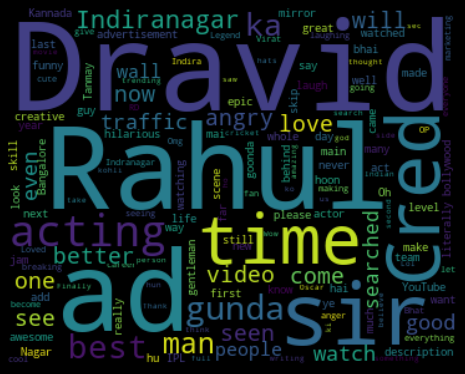

In [61]:

# word cloud visualization
## Collocations = Flase # for removing dupliacations of words

allWords = ' '.join([twts for twts in df_new['comment_new']])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 150,
                     collocations=False,mask=alice_mask).generate(allWords) 

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()